
#**Progetto Data Mining** <br>
246294  Giurranna Antoniopio <br> 239847  Ferraro Samuele <br> 239540 D'Angelo Francesco <br>







#Presentazione
Con il progetto descritto nelle seguenti pagine si è voluto affrontare un problema di regressione riguardante la previsione delle vendite di determinati prodotti in funzione di altri fattori.  
Il data set utilizzato a tal proposito è stato scelto tra quelli disponibili su kaggle.com.  



#1. Lettura dei dati in Input


In [1]:
from google.colab import drive #importiamo il dataset da google drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mobile_sales_data.csv')

Mounted at /content/drive


Verifichiamo la dimensione di righe e colonne del dataset

In [2]:
print(df.shape)       # Numero di righe e colonne
print(df.columns)     # Nomi delle colonne
print(df.head())     # Testa del data frame

(50000, 16)
Index(['Product', 'Brand', 'Product Code', 'Product Specification', 'Price',
       'Inward Date', 'Dispatch Date', 'Quantity Sold', 'Customer Name',
       'Customer Location', 'Region', 'Core Specification',
       'Processor Specification', 'RAM', 'ROM', 'SSD'],
      dtype='object')
        Product    Brand Product Code  \
0        Laptop     Vivo     63C3E712   
1        Laptop    Apple     DFD588BB   
2  Mobile Phone    Apple     D771E88F   
3        Laptop  Samsung     921F72A9   
4  Mobile Phone   Realme     16A05C02   

                               Product Specification  Price Inward Date  \
0  Series social country say great message she wh...    253  2024-04-27   
1  Feel officer worry information whatever eat si...   1557  2023-07-10   
2  Task bad artist professor capital something st...   1493  2025-02-17   
3  Blue power PM as bill to seek society before i...   1379  2024-08-12   
4  Natural even prepare local administration succ...    279  2023-12-25   

  

In [3]:
print(df.dtypes)      # Tipo di dati per ogni colonna

Product                    object
Brand                      object
Product Code               object
Product Specification      object
Price                       int64
Inward Date                object
Dispatch Date              object
Quantity Sold               int64
Customer Name              object
Customer Location          object
Region                     object
Core Specification         object
Processor Specification    object
RAM                        object
ROM                        object
SSD                        object
dtype: object


In [4]:
print(df.isnull().sum()) # Controlla la quantità di valori mancanti per ogni attributo

Product                        0
Brand                          0
Product Code                   0
Product Specification          0
Price                          0
Inward Date                    0
Dispatch Date                  0
Quantity Sold                  0
Customer Name                  0
Customer Location              0
Region                         0
Core Specification         24983
Processor Specification        0
RAM                            0
ROM                            0
SSD                        24983
dtype: int64


In [ ]:
print("elementi duplicati: ", df.duplicated().sum()) # Controlla i valori duplicati nel dataset

elementi duplicati:  0


#Data Cleaning



In questa sezione vengono lavorati i dati a disposizione in modo da facilitarne l'elaborazione.

In [ ]:
import pandas as pd
import numpy as np

# Funzione per convertire qualsiasi valore in float (GB base)
def convert_storage(value):
    if pd.isna(value):
        return np.nan
    # Se è già un numero (int o float), converti direttamente in float
    if isinstance(value, (int, float)):
        return float(value)
    # Altrimenti processa la stringa
    value = str(value).upper().strip()
    if "TB" in value:
        number = value.replace("TB", "").strip()
        return float(number) * 1000
    elif "GB" in value:
        number = value.replace("GB", "").strip()
        return float(number)
    else:
        try:
            return float(value)
        except:
            return np.nan

# Applica la funzione alle colonne specificate
for col in ['RAM', 'ROM', 'SSD', 'Price']:
    if col in df.columns:
        df[col] = df[col].apply(convert_storage)

print(df.head()) # Verifichiamo eventuali cambiamenti

        Product    Brand Product Code  \
0        Laptop     Vivo     63C3E712   
1        Laptop    Apple     DFD588BB   
2  Mobile Phone    Apple     D771E88F   
3        Laptop  Samsung     921F72A9   
4  Mobile Phone   Realme     16A05C02   

                               Product Specification   Price Inward Date  \
0  Series social country say great message she wh...   253.0  2024-04-27   
1  Feel officer worry information whatever eat si...  1557.0  2023-07-10   
2  Task bad artist professor capital something st...  1493.0  2025-02-17   
3  Blue power PM as bill to seek society before i...  1379.0  2024-08-12   
4  Natural even prepare local administration succ...   279.0  2023-12-25   

  Dispatch Date  Quantity Sold   Customer Name Customer Location   Region  \
0    2024-05-23             58  Tamara Schmidt      West Gabriel     East   
1    2023-09-06             38     Connie Park      Herringburgh    South   
2    2025-03-25             42    Nathan Heath         Brownview 

#2. Data exploration
Analisi iniziale dei dati per comprendere distribuzioni, anomalie e relazioni tra variabili. Contiene tutti i grafici, tabelle, analisi visive fatte sul set di dati.



## Palette
Vengono qui sotto indicate le palette di colori usate per i grafici.

Headers Palette


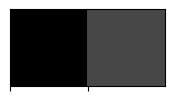

Graphics Palette


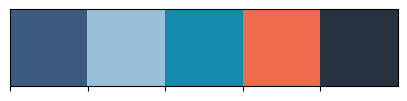

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


headers = ['#000000', '#474747']
graphics = ['#3d5a80', '#98c1d9', '#168aad', '#ee6c4d', '#293241']


print("Headers Palette")
sns.palplot(sns.color_palette(headers))
plt.show()

print("Graphics Palette")
sns.palplot(sns.color_palette(graphics))
plt.show()


# Funzione per adattare qualsiasi palette a n classi
def extend_palette(base_palette, n):
    return (base_palette * ((n // len(base_palette)) + 1))[:n]



## Istogramma
Di seguito un istogramma rappresentante le frequenze maggiori delle varie fasce di prezzo.

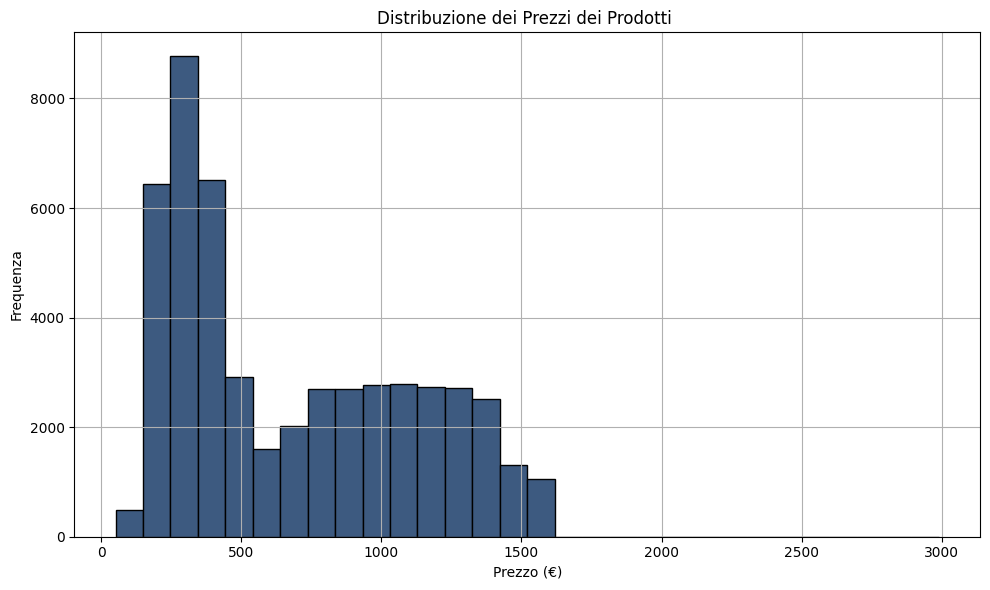

In [ ]:
import matplotlib.pyplot as plt
# Ci si assicura che la colonna dei prezzi sia di tipo numerico
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Crea l'istogramma
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=30, color=graphics[0], edgecolor='black')
plt.title('Distribuzione dei Prezzi dei Prodotti ')
plt.xlabel('Prezzo (€)')
plt.ylabel('Frequenza')
plt.grid(True)
plt.tight_layout()
plt.show()


##**BoxPlot**


Il boxplot visualizza visivamente Q1 (25° percentile), Q2 (50° percentile), Q3 (75° percentile) e consente di individuare la presenza di outlier rispetto a questi valori.

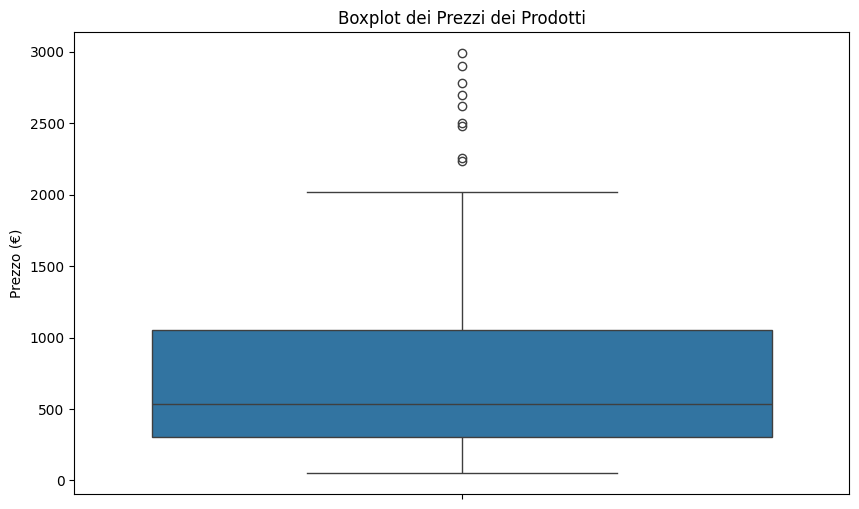

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Price'])

plt.title('Boxplot dei Prezzi dei Prodotti')
plt.ylabel('Prezzo (€)')
plt.show()


## Grafico a torta
Di seguito un grafico a torta rappresentante la distribuzione percentuale dei brand.

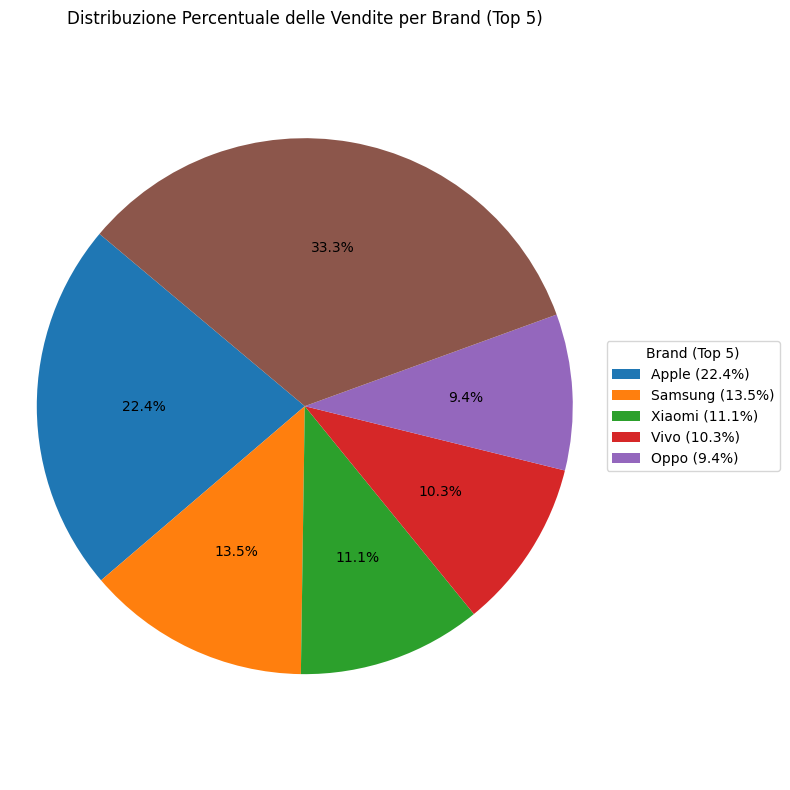

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Somma vendite per brand e ordina
brand_sales = df.groupby('Brand')['Quantity Sold'].sum().sort_values(ascending=False)

# Isola top 5 e somma il resto come "Altri"
top5 = brand_sales.head(5)
altro = brand_sales[5:].sum()

# Costruisci la serie per la torta (top5 + Altri)
pie_values = pd.concat([top5, pd.Series({'Altri': altro})])

# Calcola le percentuali
percentuali = 100 * pie_values / pie_values.sum()

# Etichette per la legenda (solo top 5)
etichette_legenda = [f"{brand} ({percentuali[brand]:.1f}%)" for brand in top5.index]

# Etichette fittizie per la torta (mostra solo le percentuali nelle fette)
torta_labels = ['' for _ in pie_values.index]

# Crea grafico
plt.figure(figsize=(8, 8))
wedges, _, _ = plt.pie(pie_values.values, labels=torta_labels, autopct='%1.1f%%', startangle=140)

# Legenda a destra con solo i top 5
plt.legend(
    [wedges[i] for i in range(5)],  # solo le prime 5 fette (esclude "Altri")
    etichette_legenda,
    title="Brand (Top 5)",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title("Distribuzione Percentuale delle Vendite per Brand (Top 5)")
plt.axis('equal')
plt.tight_layout()
plt.show()



Questo grafico mostra quali brand vendono di più in termini di unità, la fetta di mercato "visiva" dei top 5 rispetto agli altri e una rappresentazione molto più utile per capire il successo commerciale.  
La categoria "Altri" occupa il 33.3% della distribuzione, ma non è stata inserita nella legenda per questioni di leggiblità.

## Violin plot
Vediamo ora quattro diagrammi a violino:

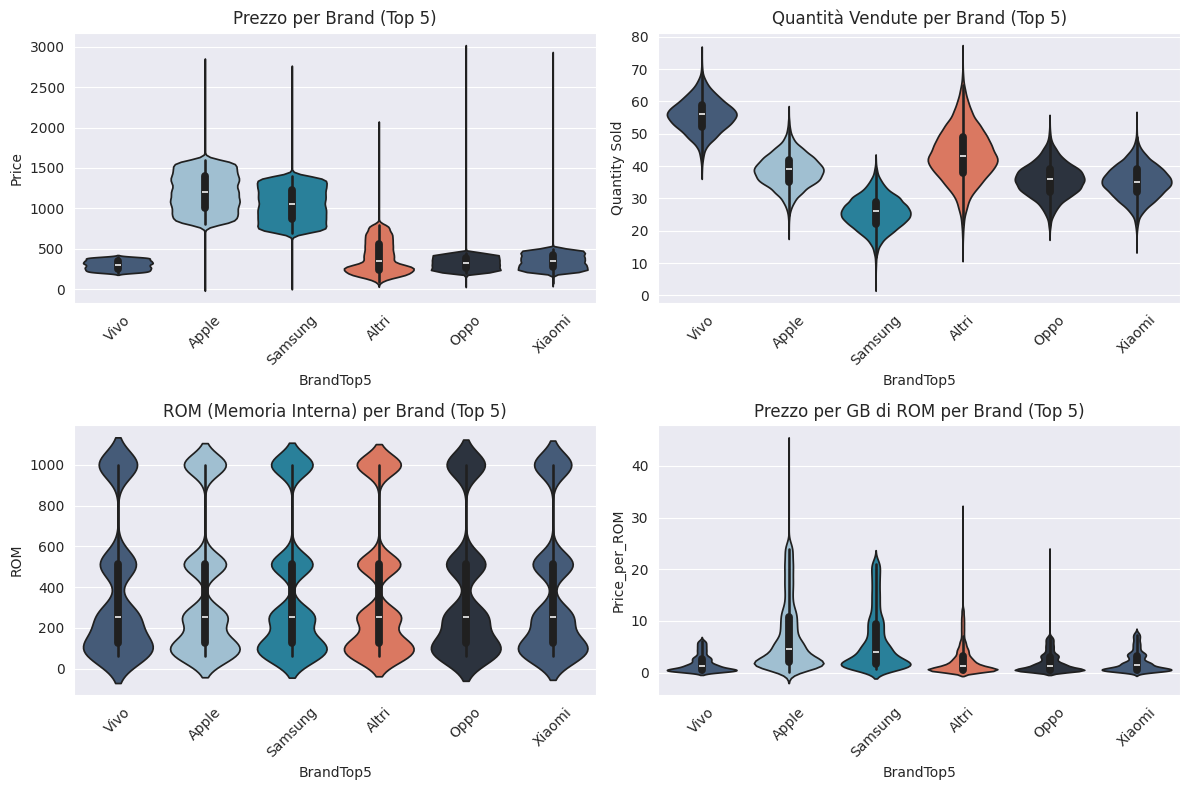

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_brands = df['Brand'].value_counts().nlargest(5).index
df['BrandTop5'] = df['Brand'].apply(lambda x: x if x in top_brands else 'Altri')

n_classi = df['BrandTop5'].nunique()

def extend_palette(base_palette, n):
    return (base_palette * ((n // len(base_palette)) + 1))[:n]

graphics_palette = extend_palette(graphics, n_classi)

# Grafico 4-in-1
plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')

# 1. Prezzo per Brand
plt.subplot(2, 2, 1)
sns.violinplot(x='BrandTop5', y='Price', hue='BrandTop5', data=df, palette=graphics_palette, legend=False)
plt.xticks(rotation=45)
plt.title('Prezzo per Brand (Top 5)')

# 2. Quantità vendute per Brand
plt.subplot(2, 2, 2)
sns.violinplot(x='BrandTop5', y='Quantity Sold', hue='BrandTop5', data=df, palette=graphics_palette, legend=False)
plt.xticks(rotation=45)
plt.title('Quantità Vendute per Brand (Top 5)')

# 3. ROM per Brand
plt.subplot(2, 2, 3)
sns.violinplot(x='BrandTop5', y='ROM', hue='BrandTop5', data=df, palette=graphics_palette, legend=False)
plt.xticks(rotation=45)
plt.title('ROM (Memoria Interna) per Brand (Top 5)')

# 4. Prezzo per ROM
plt.subplot(2, 2, 4)
df['Price_per_ROM'] = df['Price'] / df['ROM']
sns.violinplot(x='BrandTop5', y='Price_per_ROM', hue='BrandTop5', data=df, palette=graphics_palette, legend=False)
plt.xticks(rotation=45)
plt.title('Prezzo per GB di ROM per Brand (Top 5)')

plt.tight_layout()
plt.show()


## BoxPlot (prezzo/processore)
Generiamo anche dei BoxPlot che indicano il prezzo per tipo di processore.

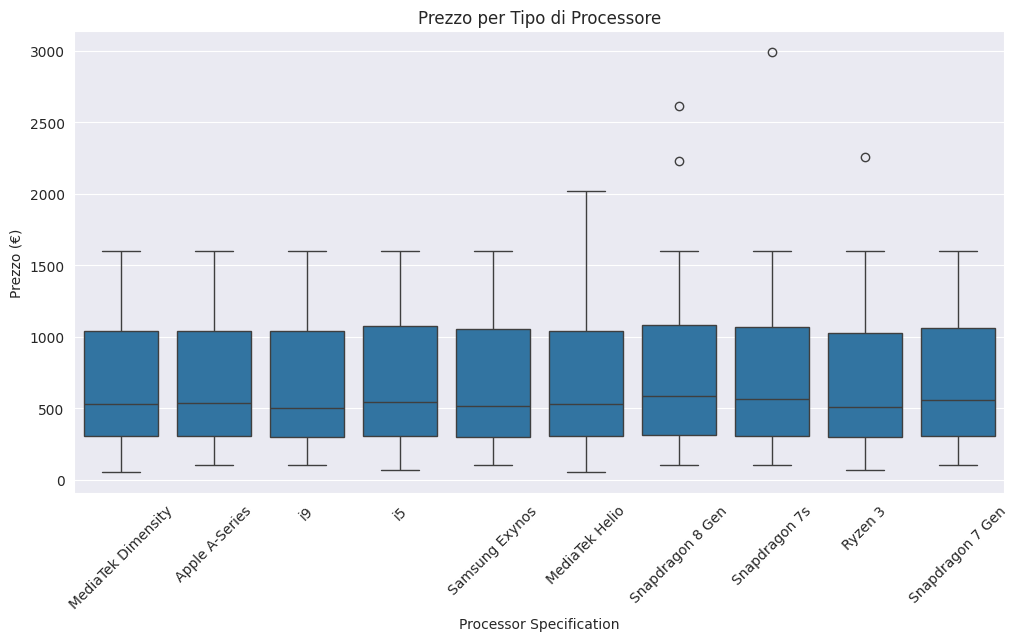

In [ ]:
top_cpu = df['Processor Specification'].value_counts().nlargest(10).index
df_top_cpu = df[df['Processor Specification'].isin(top_cpu)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Processor Specification', y='Price', data=df_top_cpu)
plt.xticks(rotation=45)
plt.title('Prezzo per Tipo di Processore')
plt.ylabel('Prezzo (€)')
plt.show()


## Pairplot
Sono utili a capire se esistono pattern tra variabili o differenze tra brand nei prodotti venduti.
Utile per valutare correlazioni, distribuzioni e potenziali separazioni tra le categorie di brand.

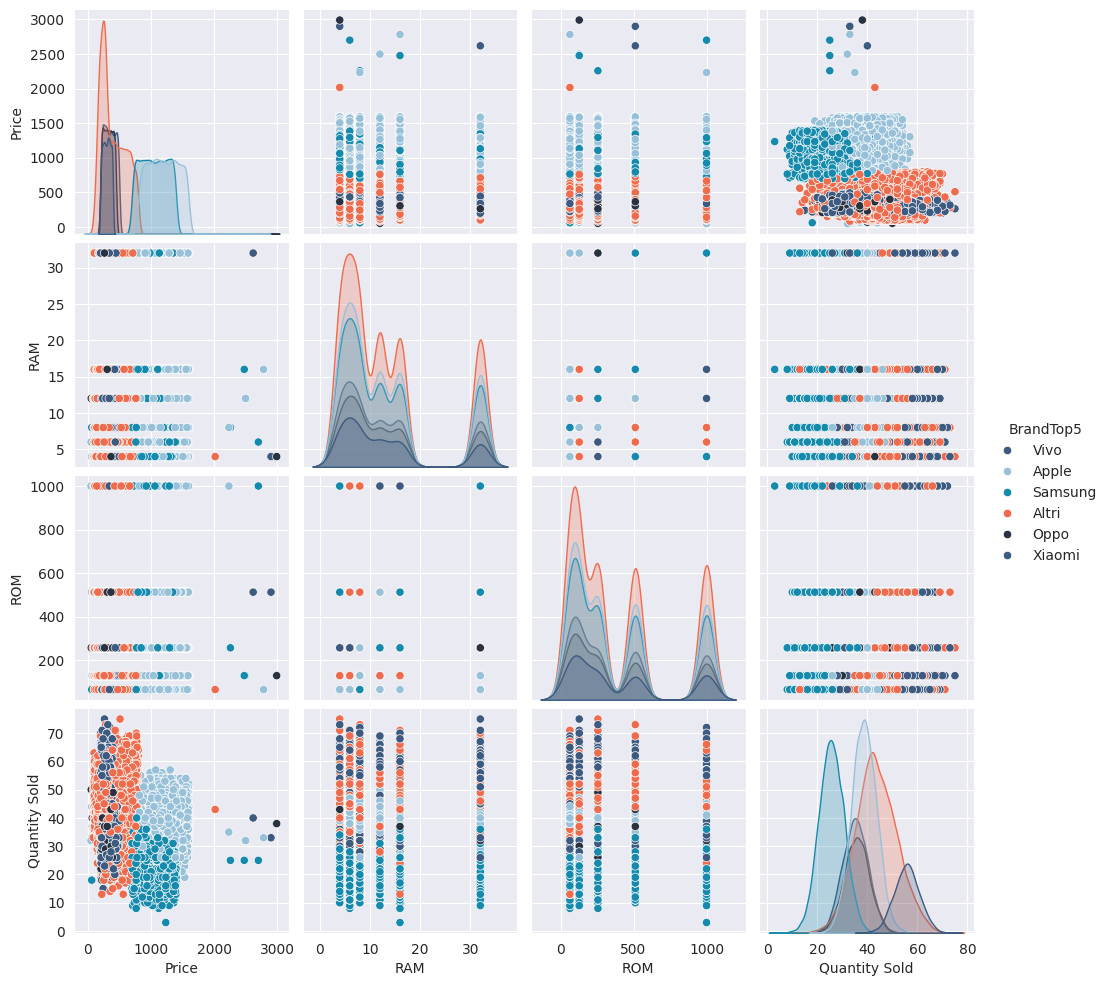

In [ ]:
import seaborn as sns

sns.pairplot(
    df,
    hue='BrandTop5',
    vars=['Price', 'RAM', 'ROM', 'Quantity Sold'],
    palette=graphics_palette
)


## Scatterplot

Servono a visualizzare la relazione tra due variabili numeriche e a capire se c'è una correlazione (positiva, negativa, nulla).

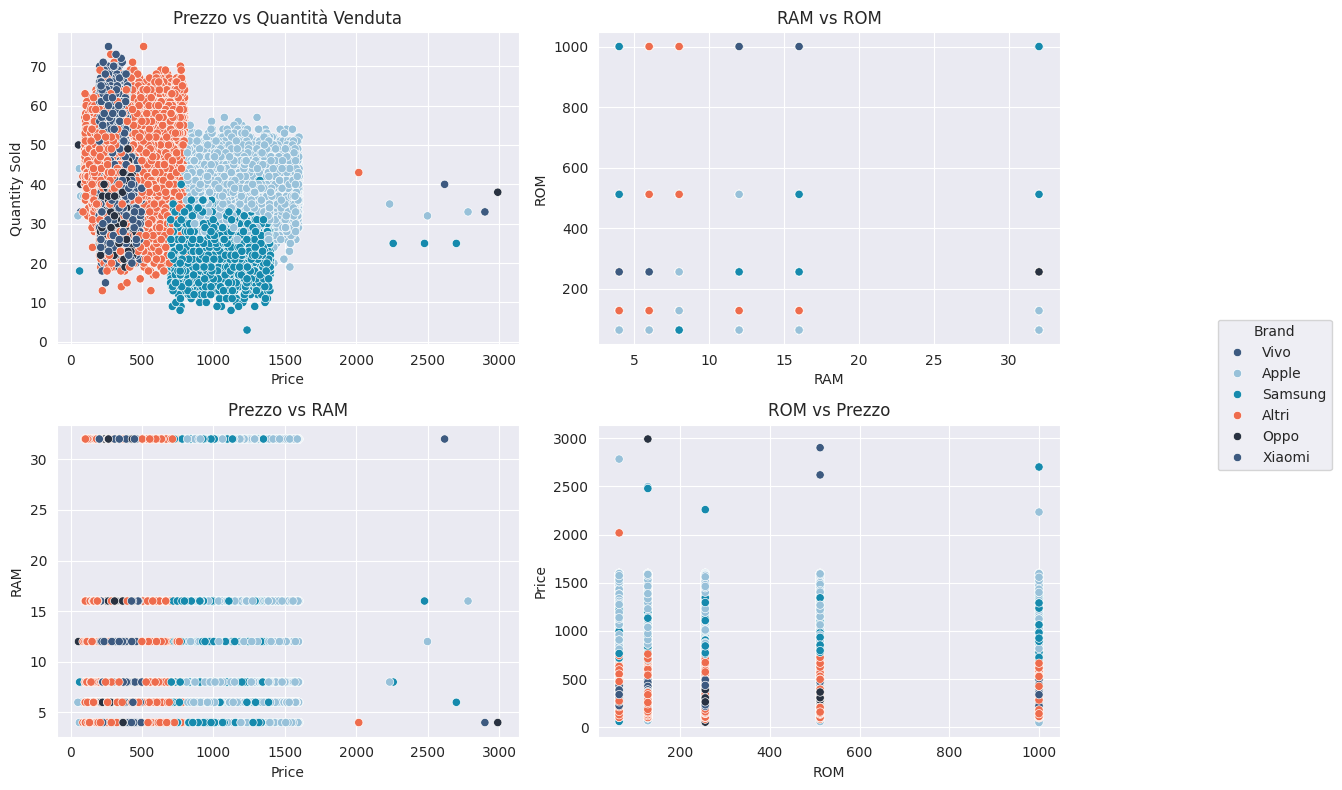

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Crea la figura e i subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.set_style('darkgrid')

# Primo scatterplot (usiamo questo solo per ottenere la legenda)
scatter = sns.scatterplot(ax=axes[0, 0], x='Price', y='Quantity Sold', hue='BrandTop5', data=df, palette=graphics_palette)
axes[0, 0].set_title("Prezzo vs Quantità Venduta")

# Rimuovi la legenda dal primo grafico
axes[0, 0].legend_.remove()

# Altri scatterplot con legenda disattivata
sns.scatterplot(ax=axes[0, 1], x='RAM', y='ROM', hue='BrandTop5', data=df, palette=graphics_palette, legend=False)
axes[0, 1].set_title("RAM vs ROM")

sns.scatterplot(ax=axes[1, 0], x='Price', y='RAM', hue='BrandTop5', data=df, palette=graphics_palette, legend=False)
axes[1, 0].set_title("Prezzo vs RAM")

sns.scatterplot(ax=axes[1, 1], x='ROM', y='Price', hue='BrandTop5', data=df, palette=graphics_palette, legend=False)
axes[1, 1].set_title("ROM vs Prezzo")

# Crea una legenda unica esterna a destra
handles, labels = scatter.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', title='Brand', bbox_to_anchor=(1.12, 0.5))

# Sistema layout per lasciare spazio alla legenda
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


## Matrice di correlazione

La matrice di correlazione mostra che le relazioni lineari tra le variabili sono in gran parte deboli o assenti, tranne alcune eccezioni rilevanti.
C'è una correlazione moderata positiva tra Price e Price_per_ROM (0.51), e una moderata negativa tra ROM e Price_per_ROM (-0.55), indicando che all’aumentare della memoria il prezzo per GB tende a diminuire.
Price ha anche una debole correlazione negativa con Quantity Sold (-0.38), suggerendo che i prodotti più costosi vendono leggermente meno.
Variabili come RAM e SSD non mostrano legami lineari significativi.

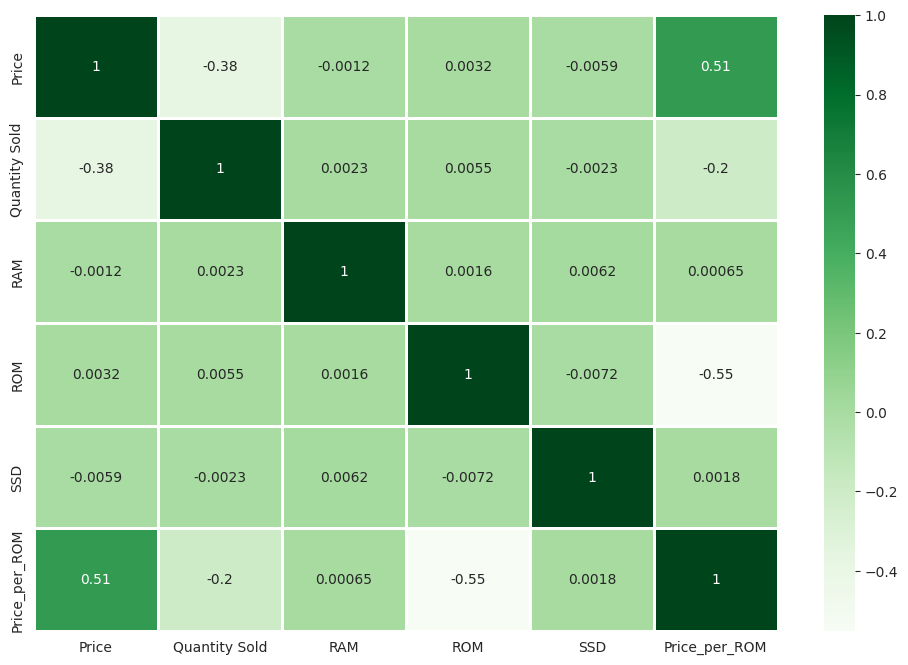

In [ ]:
# Seleziona solo le colonne numeriche rilevanti
numerical_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='Greens', linewidths=2)
plt.show()


#3. Data preprocessing
Pulizia, encoding, normalizzazione,
split tra training e test.



In [ ]:
print("righe colonne prima: ",df.shape)

if (df.duplicated().sum()>0) :
    df = df.drop_duplicates()
df.drop(['Customer Location', 'Dispatch Date', 'Inward Date',"Product Code","Product Specification","Core Specification", "Customer Name", "BrandTop5"], axis=1, inplace=True)

df_model= df.copy()

print("Product Code" in df.columns)       # Deve stampare False
print("Product Code" in df_model.columns) # Controlliamo che le colonne siano state droppate correttamente
print("righe colonne dopo:" ,df.shape)  # Verifichiamo che il numero delle righe sia uguale o diverso da prima della modifica per capire se siano stati rimossi eventuali valori duplicati

righe colonne prima:  (50000, 18)
False
False
righe colonne dopo: (50000, 10)


In [ ]:
df

,Product,Brand,Price,Quantity Sold,Region,Processor Specification,RAM,ROM,SSD,Price_per_ROM
0,Laptop,Vivo,253.0,58,East,Ryzen 5,12.0,128.0,1000.0,1.976562
1,Laptop,Apple,1557.0,38,South,Ryzen 7,8.0,128.0,256.0,12.164062
2,Mobile Phone,Apple,1493.0,42,South,MediaTek Dimensity,32.0,512.0,NaN,2.916016
3,Laptop,Samsung,1379.0,33,North,Ryzen 5,12.0,128.0,1000.0,10.773438
4,Mobile Phone,Realme,279.0,41,Central,Apple A-Series,32.0,64.0,NaN,4.359375
...,...,...,...,...,...,...,...,...,...,...
49995,Laptop,Samsung,779.0,26,North,i9,16.0,512.0,1000.0,1.521484
49996,Laptop,Sony,529.0,48,South,Ryzen 5,8.0,1000.0,256.0,0.529000
49997,Mobile Phone,Realme,259.0,45,North,MediaTek Dimensity,6.0,128.0,NaN,2.023438
49998,Laptop,Apple,908.0,40,South,Ryzen 5,32.0,64.0,256.0,14.187500


## Gestione dei dati NaN

Gestione dei valori mancanti: decidiamo come trattare le colonne con molti NaN, ad esempio Core Specification e SSD.

In [ ]:
# Metodo Nan SSD
def sostituisci_ssd(row, media_ssd_map, media_laptop):
    if pd.isna(row['SSD']):
        chiave = (row['Product'], row['Brand'])
        if chiave in media_ssd_map and str(row['Product']).strip().lower() == 'laptop':
            return media_ssd_map[chiave] # Se il prodotto è un laptop e abbiamo una media specifica per quel (Product, Brand), restituisci quella media.
        elif str(row['Product']).strip().lower() == 'mobile phone':
            return 0
        else:
            return media_laptop
    else:
        return row['SSD']

def imputazione_ssd_per_brand(df):
    # Media SSD per (Product, Brand)
    media_ssd_map = df.groupby(['Product', 'Brand'])['SSD'].mean()

    # Calcola la media SSD generale di tutti i laptop con valore valido, da usare come ultima risorsa.
    media_laptop = df.loc[(df['Product'] == 'Laptop') & (df['SSD'].notna()), 'SSD'].mean()

    # Applica la funzione passando map e media come argomenti
    df['SSD'] = df.apply(lambda row: sostituisci_ssd(row, media_ssd_map, media_laptop), axis=1)

    return df

df = imputazione_ssd_per_brand(df)

# Metodo Nan SSD
def sostituisci_ssd(row, media_ssd_map, media_laptop):
    if pd.isna(row['SSD']):
        chiave = (row['Product'], row['Brand'])
        if chiave in media_ssd_map and str(row['Product']).strip().lower() == 'laptop':
            return media_ssd_map[chiave] # Se il prodotto è un laptop e abbiamo una media specifica per quel (Product, Brand), restituisci quella media.
        elif str(row['Product']).strip().lower() == 'mobile phone':
            return 0
        else:
            return media_laptop



In [ ]:
df

,Product,Brand,Price,Quantity Sold,Region,Processor Specification,RAM,ROM,SSD,Price_per_ROM
0,Laptop,Vivo,253.0,58,East,Ryzen 5,12.0,128.0,1000.0,1.976562
1,Laptop,Apple,1557.0,38,South,Ryzen 7,8.0,128.0,256.0,12.164062
2,Mobile Phone,Apple,1493.0,42,South,MediaTek Dimensity,32.0,512.0,0.0,2.916016
3,Laptop,Samsung,1379.0,33,North,Ryzen 5,12.0,128.0,1000.0,10.773438
4,Mobile Phone,Realme,279.0,41,Central,Apple A-Series,32.0,64.0,0.0,4.359375
...,...,...,...,...,...,...,...,...,...,...
49995,Laptop,Samsung,779.0,26,North,i9,16.0,512.0,1000.0,1.521484
49996,Laptop,Sony,529.0,48,South,Ryzen 5,8.0,1000.0,256.0,0.529000
49997,Mobile Phone,Realme,259.0,45,North,MediaTek Dimensity,6.0,128.0,0.0,2.023438
49998,Laptop,Apple,908.0,40,South,Ryzen 5,32.0,64.0,256.0,14.187500


## Label Encoding

Codifica la colonna Product, che contiene solo uno tra due possibili valori.

In [ ]:
if df['Product'].dtype == 'object':
    df['Product'] = df['Product'].str.strip().str.title()
    product_mapping = {'Laptop': 0, 'Mobile Phone': 1}
    df['Product'] = df['Product'].map(product_mapping)

print(df.head())


   Product    Brand   Price  Quantity Sold   Region Processor Specification  \
0        0     Vivo   253.0             58     East                 Ryzen 5   
1        0    Apple  1557.0             38    South                 Ryzen 7   
2        1    Apple  1493.0             42    South      MediaTek Dimensity   
3        0  Samsung  1379.0             33    North                 Ryzen 5   
4        1   Realme   279.0             41  Central          Apple A-Series   

    RAM    ROM     SSD  Price_per_ROM  
0  12.0  128.0  1000.0       1.976562  
1   8.0  128.0   256.0      12.164062  
2  32.0  512.0     0.0       2.916016  
3  12.0  128.0  1000.0      10.773438  
4  32.0   64.0     0.0       4.359375  


## One-Hot Encoding

Qui viene applicato **One-Hot Encoding** alle colonne `'Brand'`, `'Region'` e `'Processor Specification'`:

* Converte ciascuna in **variabili binarie (0/1)**, una per ogni categoria.
* Rinomina le nuove colonne con prefisso (`Brand_encoded_X`, ecc.).
* Rimuove la colonna originale e aggiunge le colonne codificate.



In [ ]:
one_hot_encoding_list = ['Brand', 'Region', 'Processor Specification']
for col in one_hot_encoding_list:
    df[col] = pd.Categorical(df[col])
    dummies = pd.get_dummies(df[col], prefix=f'{col}_encoded').astype(int) # Rinomina con prefisso e converte valori booleani in interi
    df.drop(columns=[col], inplace=True)
    df = pd.concat([df, dummies], axis=1)

In [ ]:
df

,Product,Price,Quantity Sold,RAM,ROM,SSD,Price_per_ROM,Brand_encoded_Apple,Brand_encoded_Asus,Brand_encoded_Honor,...,Processor Specification_encoded_Ryzen 7,Processor Specification_encoded_Ryzen 9,Processor Specification_encoded_Samsung Exynos,Processor Specification_encoded_Snapdragon 7 Gen,Processor Specification_encoded_Snapdragon 7s,Processor Specification_encoded_Snapdragon 8 Gen,Processor Specification_encoded_i3,Processor Specification_encoded_i5,Processor Specification_encoded_i7,Processor Specification_encoded_i9
0,0,253.0,58,12.0,128.0,1000.0,1.976562,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1557.0,38,8.0,128.0,256.0,12.164062,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,1493.0,42,32.0,512.0,0.0,2.916016,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1379.0,33,12.0,128.0,1000.0,10.773438,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,279.0,41,32.0,64.0,0.0,4.359375,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,779.0,26,16.0,512.0,1000.0,1.521484,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49996,0,529.0,48,8.0,1000.0,256.0,0.529000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,1,259.0,45,6.0,128.0,0.0,2.023438,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,908.0,40,32.0,64.0,256.0,14.187500,1,0,0,...,0,0,0,0,0,0,0,0,0,0


##Algoritmi di clustering: k-means

Di seguito utilizziamo l'algoritmo di clustering K-Means come strumento di preprocessing allo scopo di avere dei raggruppamenti prima dell'esecuzione degli algoritmi di regressione.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = ['Price', 'RAM', 'ROM', 'SSD']
X = df[features]

# Pone dati di scale diverse sulla stessa per evitare conflitti (es. prezzo e ROM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)




## Coefficiente di Silhouette
Valutazione dell'algoritmo di clustering con coefficiente di Silhouette:

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, df['cluster'])
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: 0.346


Combina coesione e separazione per punti individuali per valutare quanto un punto è ben assegnato al cluster.


## SSE
Valutazione dell'algoritmo di clustering con Sum of Squared Error:

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

print(f"SSE (Inertia): {kmeans.inertia_}")


SSE (Inertia): 98926.38780516389


Indica quanto sono lontani i punti dai loro centroidi di cluster.
Si calcola come la somma dei quadrati delle distanze tra ogni punto e il centroide del cluster a cui appartiene.

## Metodo del gomito

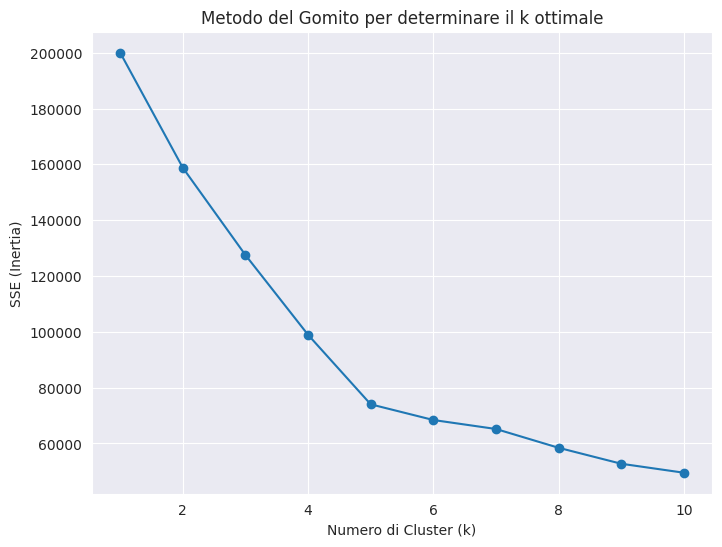

In [ ]:
import matplotlib.pyplot as plt

sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Metodo del Gomito per determinare il k ottimale')
plt.grid(True)
plt.show()


Il punto in cui la linea smette di calare drasticamente indica il numero di cluster ideale da scegliere.

##Train-test Split

Il parametro `test_size=0.35` indica che il 35% dei dati andrà nel test set, mentre il restante 65% nel training set.
`random_state=101` serve a rendere la divisione dei dati **ripetibile**: ogni volta che esegui il codice, otterrai la **stessa suddivisione**.
È utile per garantire **riproducibilità** e semplificare il **debug**. Il numero può essere qualsiasi intero: è solo un **seme casuale** per il generatore.
Se non viene specificato `random_state`, la suddivisione sarà diversa a ogni esecuzione.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Seleziona la variabile target (colonna 'Quantity Sold')
y = df['Quantity Sold'].values

# 2. Seleziona tutte le altre colonne come input (X), escludendo 'Quantity Sold'
X = df.drop(columns=['Quantity Sold'])

# 3. Suddividi in train/test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, random_state=101
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Stampa info sul dataset
print(f'Total # of samples in whole dataset: {len(X)}')
print("*****" * 10)

print(f'Total # of samples in train dataset: {len(X_train)}')
print(f'Shape of X_train: {X_train.shape}')
print("*****" * 10)

print(f'Total # of samples in test dataset: {len(X_test)}')
print(f'Shape of X_test: {X_test.shape}')


Total # of samples in whole dataset: 50000
**************************************************
Total # of samples in train dataset: 32500
Shape of X_train: (32500, 45)
**************************************************
Total # of samples in test dataset: 17500
Shape of X_test: (17500, 45)


## Distribuzione dei dati nel train e nel test set

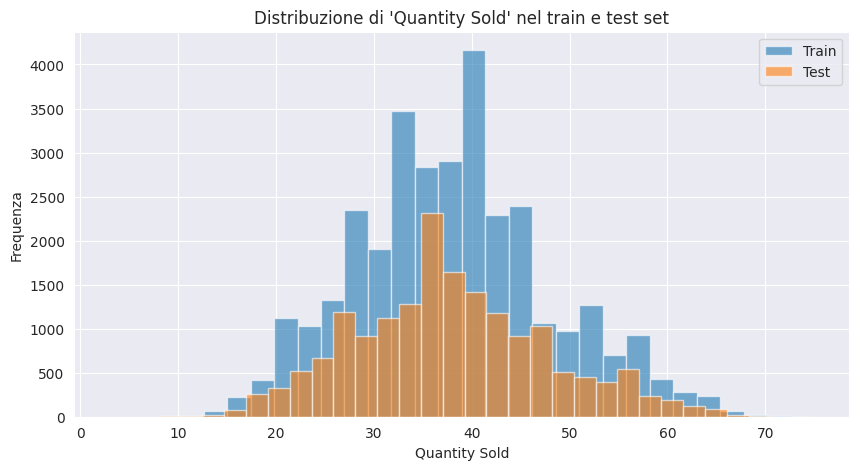

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize =(10,5))
plt.hist(y_train, bins=30, alpha=0.6, label='Train')
plt.hist(y_test, bins=30, alpha=0.6, label='Test')
plt.legend()
plt.title("Distribuzione di 'Quantity Sold' nel train e test set")
plt.xlabel("Quantity Sold")
plt.ylabel("Frequenza")
plt.show()


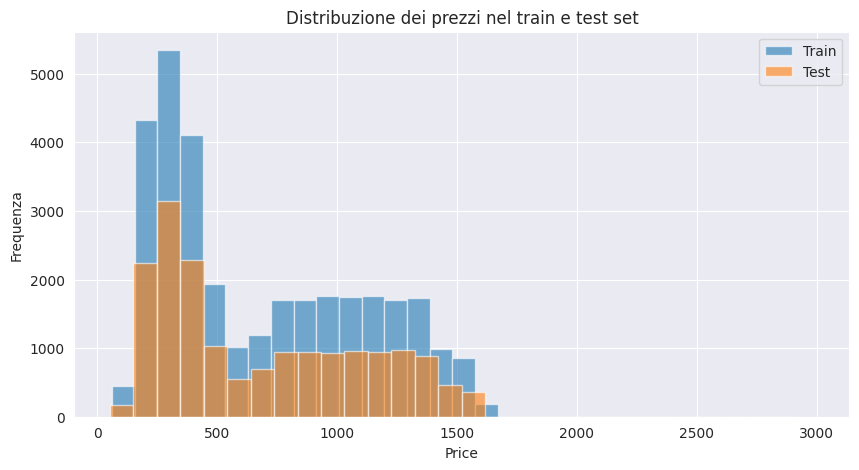

In [ ]:
# Esempio con 'Price'
plt.figure(figsize=(10,5))
plt.hist(X_train['Price'], bins=30, alpha=0.6, label='Train')
plt.hist(X_test['Price'], bins=30, alpha=0.6, label='Test')
plt.legend()
plt.title("Distribuzione dei prezzi nel train e test set")
plt.xlabel("Price")
plt.ylabel("Frequenza")
plt.show()


#4. Algoritmi di regressione

##Random Forest Regressor

Random Forest Regressor fornisce la media delle previsioni di tanti alberi decisionali.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Modello Random Forest Regressor
rf_reg = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)

# Addestramento
rf_reg.fit(X_train, y_train)

# Valutazione su test set
y_pred = rf_reg.predict(X_test)

print("\n Regressione – Valutazione (Test set):")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

# Validazione con Cross-validation (R²)
scores = cross_val_score(rf_reg, X, y, cv=5, scoring='r2')
print("\n Cross-validation R² medio:", scores.mean())
print(" R² per fold:", scores)



 Regressione – Valutazione (Test set):
Mean Absolute Error (MAE): 4.068509860283561
Mean Squared Error (MSE): 26.014014627662622
Root Mean Squared Error (RMSE): 5.100393575760857
R² Score: 0.7389523949584222

 Cross-validation R² medio: 0.7393195750935666
 R² per fold: [0.73735123 0.73636592 0.74442708 0.73790503 0.74054861]


**MAE (Mean Absolute Error)** misura quanto sbaglia in media il modello, in unità originali della variabile target (es. se Quantity Sold è in unità, allora MAE = media di unità di errore). Ogni errore ha lo stesso peso

È interpretabile direttamente: se MAE = 5, vuol dire che in media il modello sbaglia di 5 unità.

**MSE (Mean Squared Error)** misura l’errore medio al quadrato tra le predizioni del modello e i valori reali. Gli errori più grandi pesano du più
Valori più bassi indicano **migliore accuratezza**. Tuttavia, l’unità è al quadrato, quindi per una lettura più intuitiva si usa la **RMSE** (radice quadrata dell’MSE): nel nostro caso, ≈ **5 unità vendute** di errore medio.

I valori MSE tra i vari fold sono **stabili**, il che indica:

* Buona **generalizzazione** del modello
* Nessun segno evidente di **overfitting** o **squilibrio**



La cross-validation serve a
1. Evitare una valutazione dipendente dal singolo split train/test, la divisione in training e test può influenzare i risultati, specialmente con dataset non troppo grandi. La CV ripete il training su diversi split (qui cv=5, quindi 5 partizioni), rendendo la valutazione più robusta e generalizzabile.

2. Ottenere una media delle performance su tutto il dataset,
con scores.mean() ottieni un R² medio su tutti i fold. È un indicatore di quanto bene il modello si generalizza su dati mai visti.

### Valori veri vs. predetti

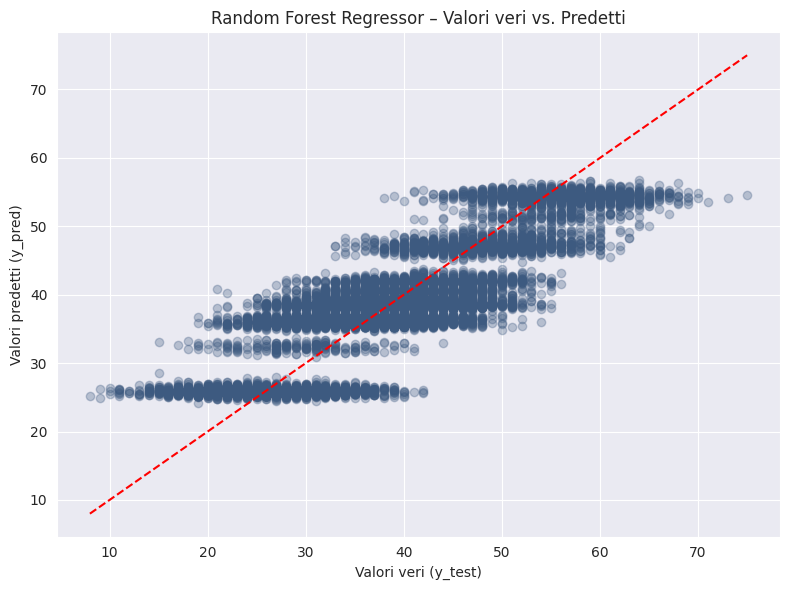

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color=graphics[0])
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # linea ideale
plt.xlabel("Valori veri (y_test)")
plt.ylabel("Valori predetti (y_pred)")
plt.title("Random Forest Regressor – Valori veri vs. Predetti")
plt.grid(True)
plt.tight_layout()
plt.show()


##KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Prova vari valori di k
for k in [3, 5, 7, 9, 11]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)

    print(f"\n🔹 K = {k}")
    print("MAE:", mean_absolute_error(y_test, y_pred_knn))
    print("MSE:", mean_squared_error(y_test, y_pred_knn))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_knn)))
    print("R² Score:", r2_score(y_test, y_pred_knn))



🔹 K = 3
MAE: 4.589561904761904
MSE: 33.13636825396825
RMSE: 5.756419742684532
R² Score: 0.6674804063777293

🔹 K = 5
MAE: 4.357074285714285
MSE: 29.84447085714286
RMSE: 5.463009322447003
R² Score: 0.7005142131078167

🔹 K = 7
MAE: 4.274604081632654
MSE: 28.609738775510205
RMSE: 5.348807229234403
R² Score: 0.712904605647823

🔹 K = 9
MAE: 4.215815873015872
MSE: 27.791268430335098
RMSE: 5.271742447268749
R² Score: 0.7211178601748007

🔹 K = 11
MAE: 4.171532467532469
MSE: 27.24362691853601
RMSE: 5.219542788265655
R² Score: 0.7266133789220102


La scelta del parametro k (cioè il numero di vicini considerati) è cruciale, perché ha un impatto diretto sulla precisione del modello, infatti con K piccolo (es. 1–3) il modello considera solo pochi vicini → più sensibile al rumore.

Più preciso localmente, ma può sovra-adattarsi (overfitting).

Con K grande (es. 10–20 o più) considera più vicini, fa una media più "morbida".

Meno sensibile al rumore, ma può perdere dettaglio (underfitting).

Se i dati sono sparsi o molto rumorosi, K piccolo è rischioso.

Se i dati sono densi e ben distribuiti, K grande può funzionare bene.

Nel nostro caso si è optato per K=11 in quanto offre risultati migliori a seguito di alcuni test effettuati (si vedano risultati sopra).

### Valori veri vs. predetti

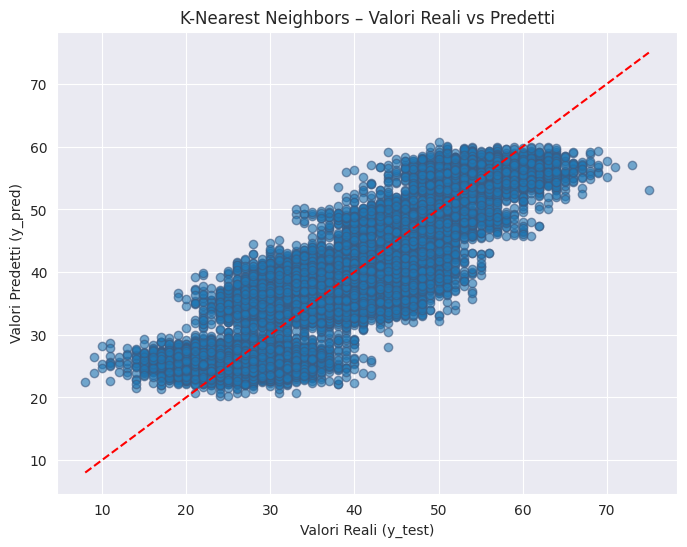

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.6, edgecolors=graphics[0])
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valori Reali (y_test)')
plt.ylabel('Valori Predetti (y_pred)')
plt.title('K-Nearest Neighbors – Valori Reali vs Predetti')
plt.grid(True)
plt.show()


##HistGradientBoostingRegressor

Inizia con una previsione grezza (es. la media dei target).

Costruisce alberi uno dopo l’altro: ogni nuovo albero cerca di correggere gli errori residui fatti dai precedenti.

Usa una tecnica chiamata Gradient Boosting: ottimizza le previsioni minimizzando l’errore (es. MSE).

Per essere più veloce, trasforma le variabili continue in bin (istogrammi) → meno RAM, più velocità.

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Modello standard
gbr = HistGradientBoostingRegressor(max_iter=100, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

# Metriche di valutazione
print("MAE:", mean_absolute_error(y_test, y_pred_gbr))
print("MSE:", mean_squared_error(y_test, y_pred_gbr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gbr)))
print("R² Score:", r2_score(y_test, y_pred_gbr))


MAE: 3.994288596511406
MSE: 25.004886800446414
RMSE: 5.000488656166157
R² Score: 0.7490788750979189


### Valori veri vs. predetti

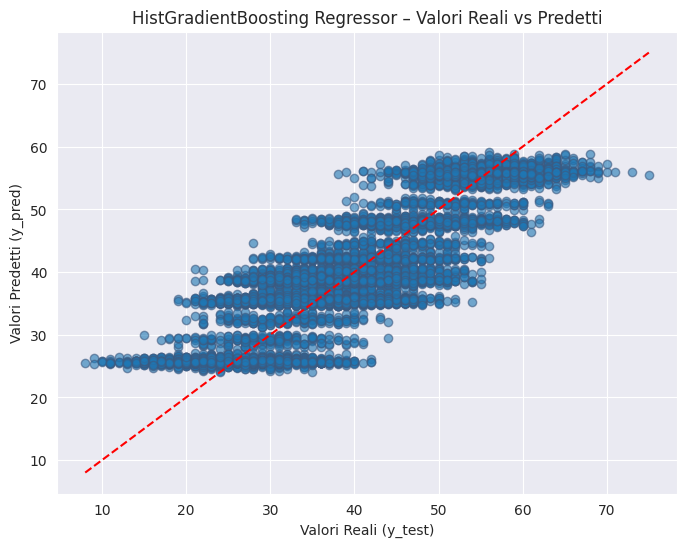

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gbr, alpha=0.6, edgecolors=graphics[0])
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonale perfetta
plt.xlabel('Valori Reali (y_test)')
plt.ylabel('Valori Predetti (y_pred)')
plt.title('HistGradientBoosting Regressor – Valori Reali vs Predetti')
plt.grid(True)
plt.show()


#5. Analisi dei risultati ottenuti
**Sintesi delle metriche di valutazione**

Presenta una tabella comparativa delle metriche chiave per ciascun modello testato. Le metriche utilizzate sono:

* Mean Absolute Error (MAE): media degli errori assoluti tra le previsioni e i valori reali.

* Mean Squared Error (MSE): media degli errori al quadrato, penalizza maggiormente gli errori più grandi.

* Root Mean Squared Error (RMSE): radice quadrata del MSE, espressa nella stessa unità della variabile target.

* R² Score: coefficiente di determinazione, indica la proporzione della varianza della variabile target spiegata dal modello.





Risultati senza applicare algoritmi di clustering:

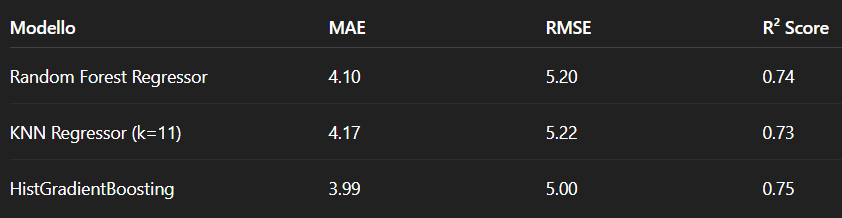

RIsultati applicando k-means:

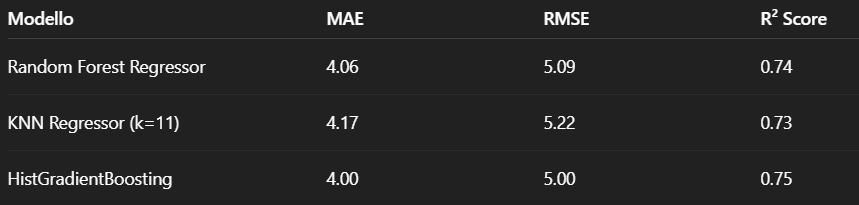

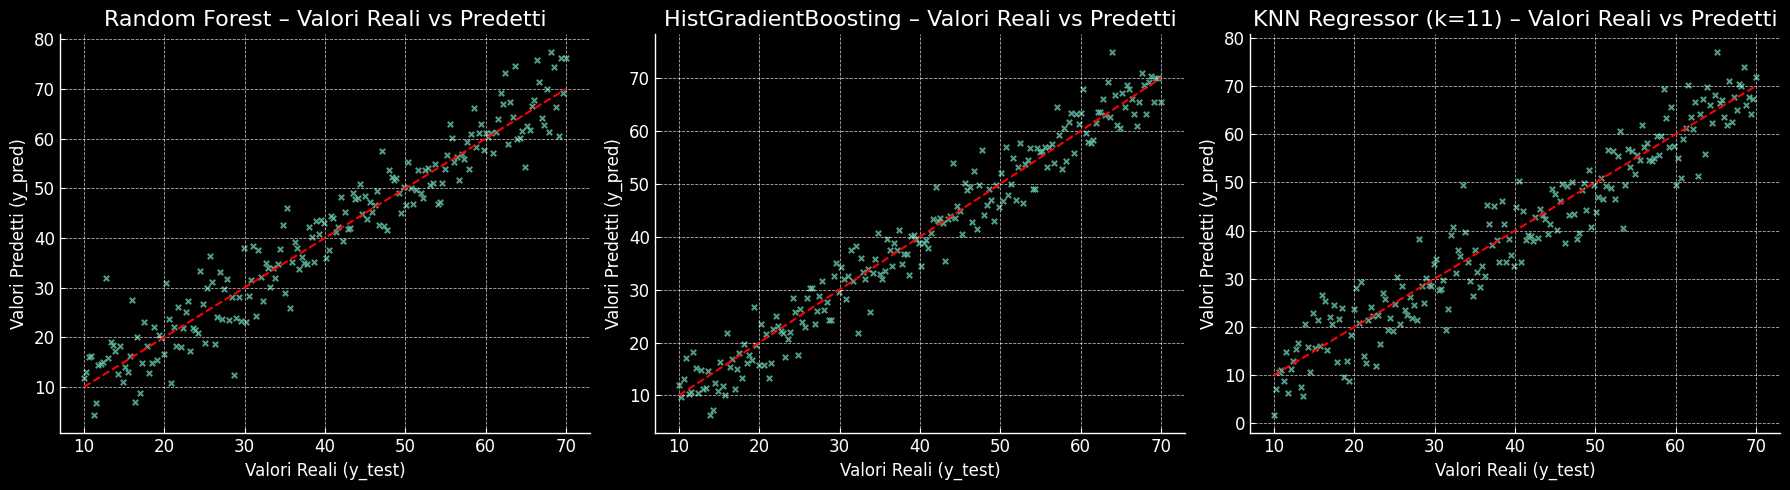

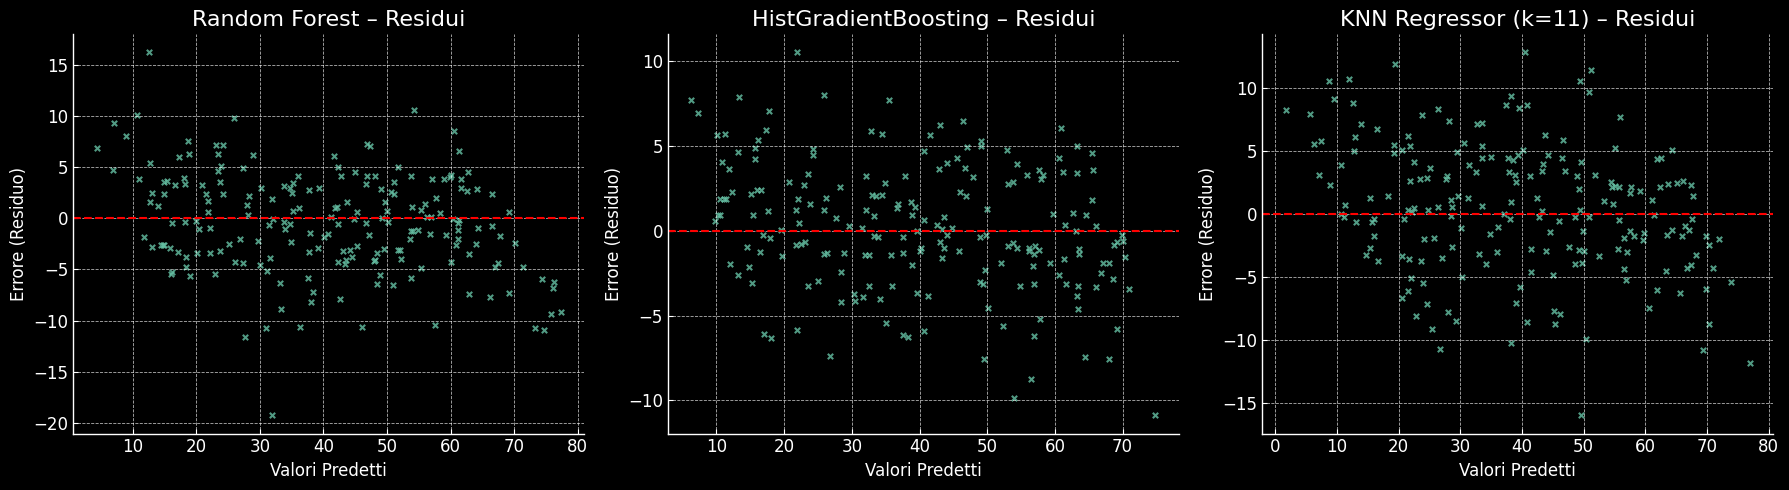

Dall’analisi dei grafici, il modello HistGradientBoosting Regressor risulta il più preciso, con predizioni ben allineate alla diagonale e residui distribuiti in modo equilibrato. Anche il Random Forest Regressor si comporta molto bene, con prestazioni simili ma leggermente inferiori.
Il KNN Regressor (k=11), pur rimanendo meno accurato rispetto agli altri modelli, ha beneficiato di un netto miglioramento in seguito all'applicazione dello scaling delle variabili, che ha reso le predizioni più coerenti e gli errori meno dispersivi.



**Interpretazione delle metriche**

MAE e RMSE: valori più bassi indicano previsioni più accurate. Il RMSE penalizza maggiormente gli errori più grandi, rendendolo sensibile agli outlier.

R² Score: valori prossimi a 1 indicano che il modello spiega bene la variabilità dei dati. Un R² di 0.75 significa che il 75% della varianza della variabile target è spiegata dal modello.

---

**Analisi degli errori**

Esamina la distribuzione degli errori (residui) per identificare eventuali pattern:


Distribuzione simmetrica attorno a zero: indica che il modello non ha bias sistematici.

Un'analisi dettagliata dei residui può fornire insight su come migliorare ulteriormente il modello.


---

**Importanza delle variabili**

Utilizza l'attributo `feature_importances` dei modelli come Random Forest e HistGradientBoosting per identificare le variabili più influenti nelle previsioni. Questo può aiutare a comprendere meglio i fattori che influenzano la variabile target e a semplificare il modello rimuovendo variabili meno significative.

---

**Conclusioni**

Modello migliore
L’HistGradientBoosting Regressor si è dimostrato il modello più performante, con i valori più bassi di MAE e RMSE e il coefficiente di determinazione R² più elevato. Le sue predizioni sono risultate molto accurate e ben allineate ai valori reali, con una distribuzione dei residui regolare e priva di pattern evidenti.

KNN Regressor
Il KNN Regressor (k=11) ha ottenuto risultati meno accurati rispetto agli altri modelli, ma ha mostrato un miglioramento significativo grazie all’applicazione dello scaling delle variabili. Nonostante ciò, la sua efficacia rimane limitata in presenza di dati con molte dimensioni e relazioni non lineari.

Random Forest Regressor
Il Random Forest Regressor ha fornito prestazioni solide, con buoni livelli di accuratezza e una buona distribuzione dei residui. Sebbene leggermente inferiore all’HistGradientBoosting, rappresenta comunque una scelta valida ed equilibrata per il problema affrontato.


##Dati della tabella

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Dizionario per raccogliere i risultati
risultati = []

# 1. Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split=10,
                           min_samples_leaf=5, max_features='sqrt', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

risultati.append({
    "Modello": "Random Forest Regressor",
    "MAE": mean_absolute_error(y_test, y_pred_rf),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    "R² Score": r2_score(y_test, y_pred_rf)
})

# 2. KNN Regressor (k=11)
knn = KNeighborsRegressor(n_neighbors=11)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

risultati.append({
    "Modello": "KNN Regressor (k=11)",
    "MAE": mean_absolute_error(y_test, y_pred_knn),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_knn)),
    "R² Score": r2_score(y_test, y_pred_knn)
})

# 3. HistGradientBoosting
gbr = HistGradientBoostingRegressor(max_iter=100, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

risultati.append({
    "Modello": "HistGradientBoosting",
    "MAE": mean_absolute_error(y_test, y_pred_gbr),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_gbr)),
    "R² Score": r2_score(y_test, y_pred_gbr)
})

# 4. Crea la tabella finale
df_risultati = pd.DataFrame(risultati)
print(df_risultati)


                   Modello       MAE      RMSE  R² Score
0  Random Forest Regressor  4.068510  5.100394  0.738952
1     KNN Regressor (k=11)  4.171532  5.219543  0.726613
2     HistGradientBoosting  3.994289  5.000489  0.749079
